# Chapter.15 머신러닝
- scikit-Iearn 라이브러리에는 회귀, 분류，차원 축소，클러스터텅 등 머신러닝 관련 알고리즘의 종합적인 집합

In [2]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Built in datasets
- 머신 러닝에서는 관측 데이터에 모넬이나 알고리즘을 적합화하는 과정을 훈련이라고 함
1. 지도학습(supervised Learning) - 회귀/ 분류
2. 강화학습(unsupervised Learning) - 군집화
- 교차검증: 과적합을 방지하기 위해 훈련 데이터와 테스트 데이터를 나누는 방법 - k-fold
- 특징추출: 데이터별로 어떤 특징을 가지고 있는지를 찾아내고, 그것을 토대로 데이터를 벡터로 변환하는 작업
- 차원축소/특징선택: 모델의 복잡도를 줄이기 위해 덜 유용한 특징을 제거해 차원을 축소 - PCA(주성분분석)

In [3]:
datasets.load_boston

<function sklearn.datasets._base.load_boston(*, return_X_y=False)>

In [4]:
datasets.fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)>

In [5]:
datasets.make_regression

<function sklearn.datasets._samples_generator.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

# Regression 회귀
- 실제 값과 예측값의 차이를 최소화하는 것

In [6]:
np.random.seed(123)

In [7]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) #, noise=2.5)
# make_regresstion 함수: 회귀 모델의 예측을 보기위한 데이터를 생성
# 50개의 표본과 50개의 특정을 가진 회귀 문제의 설계 행렬

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)
# train_test_split 함수: 데이터 집합을 2개의 동일한 크기의 데이터 집합으로 분할

In [9]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [10]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [11]:
model = linear_model.LinearRegression() # LinearRegresstion 클래스를 사용해 선형 회귀 수행

In [12]:
model.fit(X_train, y_train) # 데이터에 적합화

LinearRegression()

In [13]:
def sse(resid):
    return sum(resid**2)

In [14]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train) # SSE 계산
sse_train

9.701348303535586e-25

In [15]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_train)
sse_test

9.701348303535586e-25

In [16]:
model.score(X_train, y_train) # 훈련 데이터의 R제곱 점수

1.0

In [17]:
model.score(X_test, y_test) #테스트 데이터의 R제곱 점수
# 훈련 데이터셋과 테스트 데이터셋의 점수차가 크다 = 모델 과적합

0.3140740067520176

In [18]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

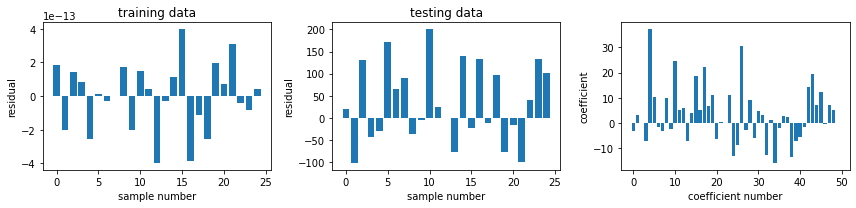

In [19]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ols.pdf")
# 일반 선형회귀 모델(왼쪽)/ 모델과 테스트 데이터와의 잔차(중앙)/ 50개 특징의 계수값(오른쪽)

### 정규화 회귀

In [26]:
model = linear_model.Ridge(alpha=2.5) # Ridge 클래스를 사용해 리지 회귀 분석 수행

In [27]:
model.fit(X_train, y_train) # fit 메서드 사용

Ridge(alpha=2.5)

In [28]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2) # SSE 계산
sse_train

981.3329534554769

In [29]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2) # SSE 계산
sse_test # 테스트 데이터에 대한 SSE는 약간의 감소가 있음

211378.08801715088

In [30]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9970289116693013, 0.32106806468101434)

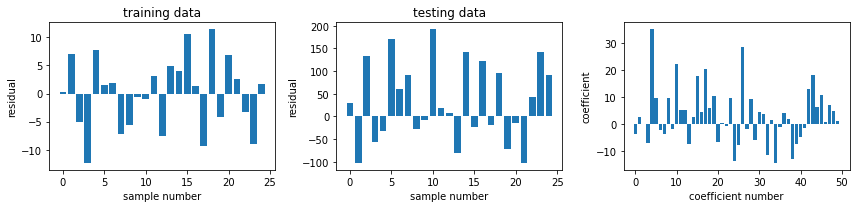

In [31]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ridge.pdf")

### L1 - 정규화 라소 회귀

In [32]:
model = linear_model.Lasso(alpha=1.0)

In [33]:
model.fit(X_train, y_train)

Lasso()

In [34]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

309.7497138953233

In [35]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test
# 훈련 데이터의 SSE가 일반 회귀와 비교해 증가했지만 테스트 데이터의 SSE는 현저하게 감소
# 만약 회귀 모델에 크게 기여하지 않을 것으로 생각되는 특정이 있다고 의심되면 라소 회귀의 L1 정규회를 사용

1489.117606500263

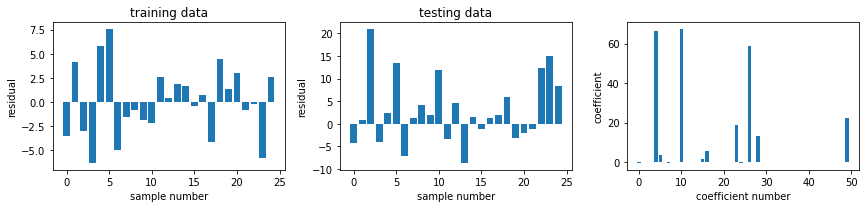

In [36]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso.pdf")

In [37]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.11475067343923, tolerance: 33.02941024391199
  model = cd_fast.enet_coordinate_descent(
C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.82233955030587, tolerance: 33.02941024391199
  model = cd_fast.enet_coordinate_descent(
C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.204461099971375, tolerance: 33.02941024391199
  model = cd_fast.enet_coordinate_descent(
C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

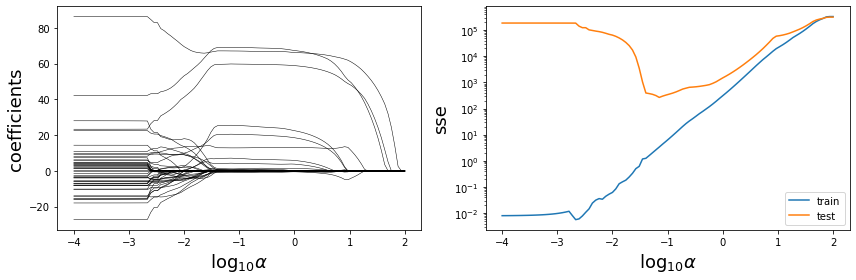

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()
fig.savefig("ch15-regression-lasso-vs-alpha.pdf")
# 정규화 강도 a의 로그에 대한 함수로 라소를 수행한 계수(왼쪽)
# 훈련 및 테스트 데이터셋의 제곱 오차 합(오른쪽)

### a에 대한 정규화 회귀 테스트

In [39]:
model = linear_model.LassoCV()

In [40]:
model.fit(X_all, y_all)

LassoCV()

In [41]:
model.alpha_

0.06559238747534718

In [42]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.5450589323148252

In [43]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1.5321417406217284

In [44]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9999953221722068, 0.9999950788657098)

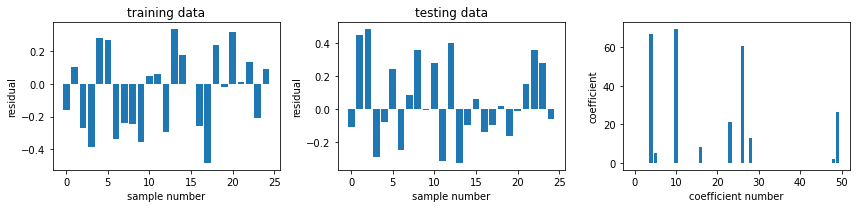

In [45]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso-cv.pdf")

### ElasticNet
- 라소와 리지의 L1 , L2 정규화를 결합한 형태

In [46]:
model = linear_model.ElasticNetCV()

In [47]:
model.fit(X_all, y_all)

ElasticNetCV()

In [48]:
model.alpha_

0.13118477495069436

In [49]:
model.l1_ratio

0.5

In [50]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

2183.8391729391233

In [51]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

2650.05044633825

In [52]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9933881981034111, 0.9914882195448783)

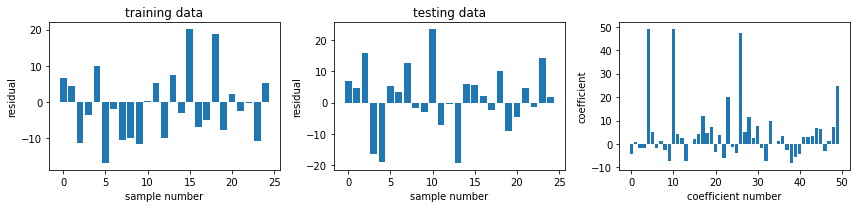

In [53]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-elastic-net-cv.pdf")

# Classification 분류
- 최근접 이웃, 서포트 벡터 머신, 의사 결정 트리, 랜텀 포레스트 방식 등이 있음

In [63]:
iris = datasets.load_iris() # 데이터셋 로드

In [64]:
type(iris)

sklearn.utils.Bunch

In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
iris.data.shape

(150, 4)

In [68]:
iris.target.shape

(150,)

In [69]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7) # 7 대 3으로 분할

In [70]:
classifier = linear_model.LogisticRegression() # 로지스틱 회귀 분류 수행

In [71]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_test_pred = classifier.predict(X_test)

In [73]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      1.00      0.89        12
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



In [74]:
np.bincount(y_test)

array([16, 12, 17], dtype=int64)

In [75]:
metrics.confusion_matrix(y_test, y_test_pred) # 혼돈 행렬

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  3, 14]], dtype=int64)

In [76]:
classifier = tree.DecisionTreeClassifier() # 의사 결정 트리 사용한 경우
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  3, 14]], dtype=int64)

In [77]:
classifier = neighbors.KNeighborsClassifier() # 최근접 이웃을 사용한 경우
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 15]], dtype=int64)

In [79]:
classifier = svm.SVC() # 서포트 벡터머신을 사용한 경우
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  4, 13]], dtype=int64)

In [80]:
classifier = ensemble.RandomForestClassifier() # 랜덤 포레스트를 사용한 경우
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 15]], dtype=int64)

In [81]:
train_size_vec = np.linspace(0.1, 0.9, 30) # 각각의 분류기 성능 비교

In [83]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier]

In [84]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)
# 훈련 집합 크기의 비율과 분류기의 함수로 혼돈 행렬의 대각을 저장할 배열을 생성

In [85]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)
# 각 훈련 크기 비율과 분류기에 작업을 반복하고 각 조합의 분류기를 훈련
# 테스트 데이터의 값 예측, 혼돈 행렬 계산
# 대각을 cm_diags 배열의 이상적인 수치로 나눈 값으로 저장

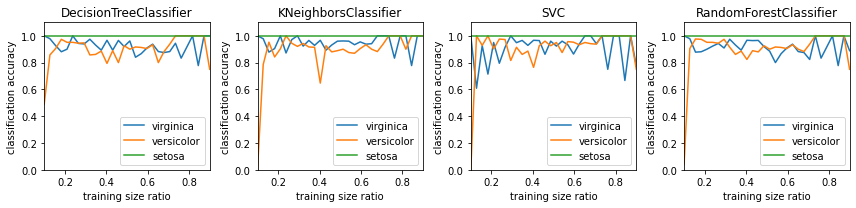

In [86]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()
fig.savefig("ch15-classification-comparison.pdf")

# Clustering 클러스터링
- 클러스터링(군집화)은 개체들이 주어졌을 때, 개체들을 몇 개의 클러스터(부분 그룹)으로 나누는 과정
1. k-mean 클러스터링
2. mean shift 클러스터링

In [87]:
X, y = iris.data, iris.target # 특징과 목표 데이터를 각각 변수에 저장

In [88]:
np.random.seed(123)

In [89]:
n_clusters = 3 # 클러스터 수 설정

In [90]:
c = cluster.KMeans(n_clusters=n_clusters) # k-mean 클러스터링

In [91]:
c.fit(X)

KMeans(n_clusters=3)

In [92]:
y_pred = c.predict(X)

In [93]:
y_pred[::8] # NumPy stride 인덱싱 ::8을 사용해 배열의 여덟 번째 요소까지만 표시

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [94]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [95]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [96]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [97]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [98]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

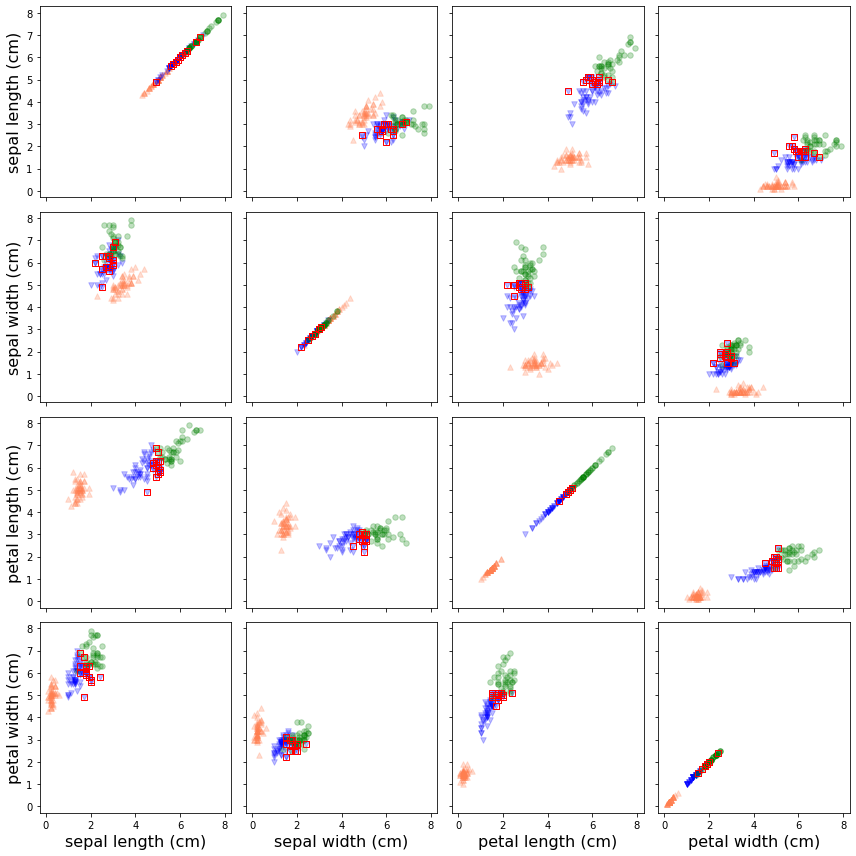

In [99]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()
fig.savefig("ch15-clustering.pdf")